In [1]:
#pip install control #Instalação da lib CONTROL (necessário executar só uma vez em ambientes novos)

In [2]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

# Funções de Transferência

In [3]:
Tsim = 600 #tempo simulação
s = ctl.TransferFunction.s

#### Planta

In [4]:
R1 = 10e3
R2 = 100e6
C = 5e-3
L = 1

P_s = R2/((R1*C*L)*s**2 + (L+R1*R2*C)*s + (R1+R2))
display(P_s)

TransferFunction(array([1.e+08]), array([5.0000e+01, 5.0000e+09, 1.0001e+08]))

#### Controlador PID

In [5]:
Kp = 45
Ki = 7
Kd = Ki/5

C_s = (Kd*s**2 + Kp*s + Ki) / s
display(C_s)

TransferFunction(array([ 1.4, 45. ,  7. ]), array([1, 0]))

#### Sensor

In [6]:
H_s = 1/1
display(H_s)

1.0

# Malha Fechada

In [7]:
Parte_superior = ctl.series(C_s, P_s) #Controlador * Planta

G1_s = ctl.feedback(Parte_superior, H_s, sign = -1) # Adiciona sensor (feedback)
display(G1_s)

TransferFunction(array([1.4e+08, 4.5e+09, 7.0e+08]), array([5.00000e+01, 5.14000e+09, 4.60001e+09, 7.00000e+08]))

# Resposta ao degrau

#### Função degrau unitário

In [8]:
T = np.linspace(-1, Tsim, 100000) 

degrau = np.ones_like(T)
degrau[T<0] = 0
degrau[T>180] = 4.5
degrau[T>370] = 2

#### Respostas ao degrau

In [9]:
T, yout = ctl.forced_response(P_s, T, degrau) #step_response(P_s, T, input = degrau)
T, you_mf = ctl.forced_response(G1_s, T, degrau) #step_response(G1_s, T, input = )

#### Plot resultados

Text(0.5, 1.0, 'Sistema de 2ª ordem')

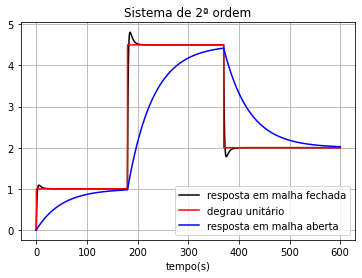

In [10]:
plt.plot(T, you_mf, 'k-')
plt.plot(T, degrau, 'r-')
plt.plot(T, yout, 'b-')
plt.xlabel('tempo(s)')
plt.legend(['resposta em malha fechada', 'degrau unitário', 'resposta em malha aberta'])
plt.grid()
plt.title('Sistema de 2ª ordem')

Text(0.5, 1.0, 'Sistema de 2ª ordem')

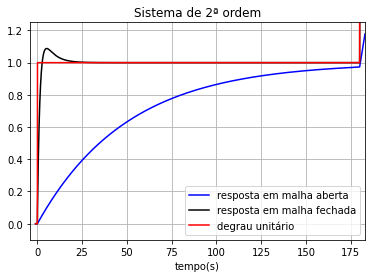

In [11]:
plt.plot(T, yout, 'b-')
plt.plot(T, you_mf, 'k-')
plt.plot(T, degrau, 'r-')
plt.xlabel('tempo(s)')
plt.legend([ 'resposta em malha aberta','resposta em malha fechada', 'degrau unitário',])
plt.grid()
plt.xlim(-4,183)
plt.ylim(-0.1,1.25)
plt.title('Sistema de 2ª ordem') 